In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt


def create_spectrogram(filename):
    # Load the audio file
    y, sr = librosa.load(filename)

    # Compute the spectrogram as the square of the complex magnitude of the STFT (Short-Time Fourier Transform)
    # You may also explore other parameters within the STFT, depending on your specific needs.
    D = np.abs(librosa.stft(y))**2
    S_db = librosa.power_to_db(D, ref=np.max)

    # Plotting the spectrogram and setting the labels and titles
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()


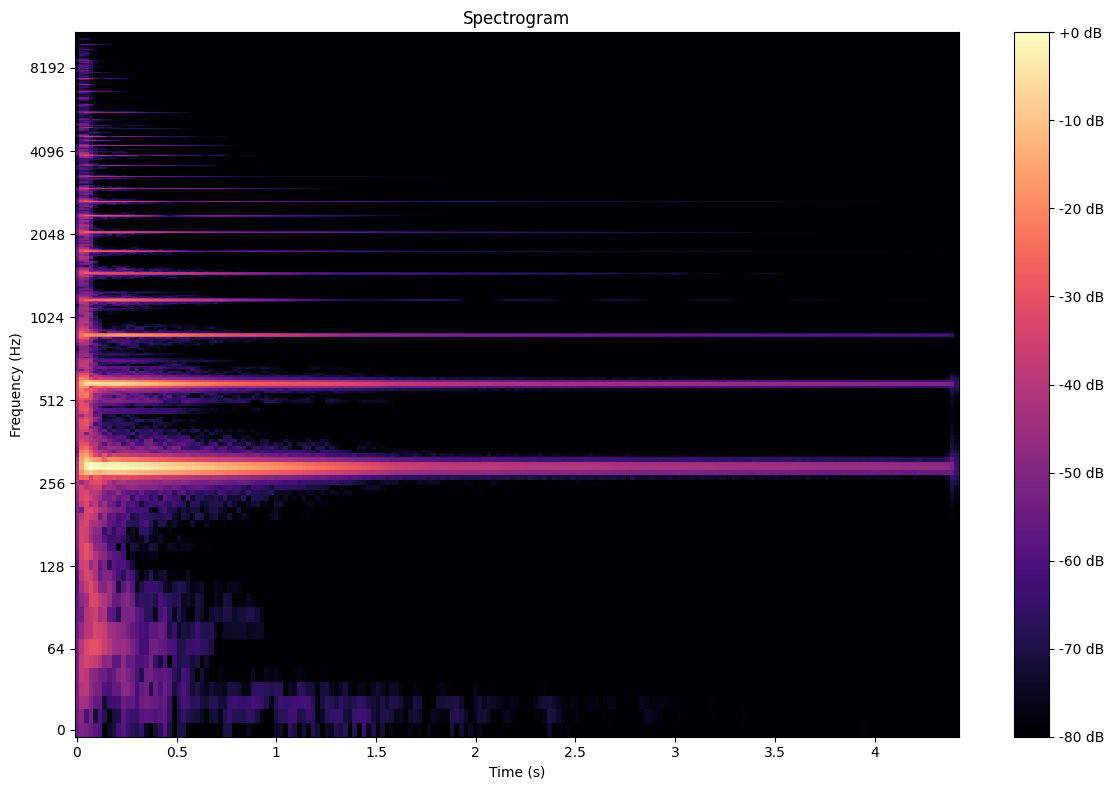

In [2]:
file = './data/D5.mp3'
create_spectrogram(file)

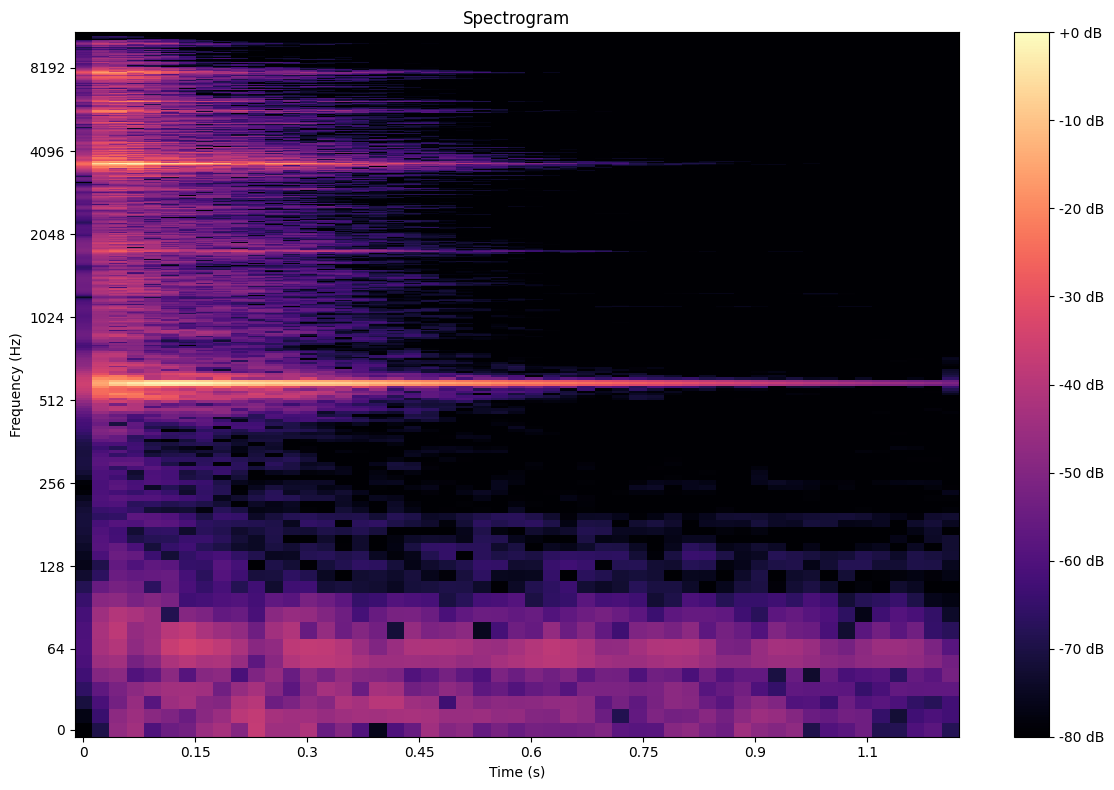

In [3]:
file = './data/D5_Xyl.mp3'
create_spectrogram(file)

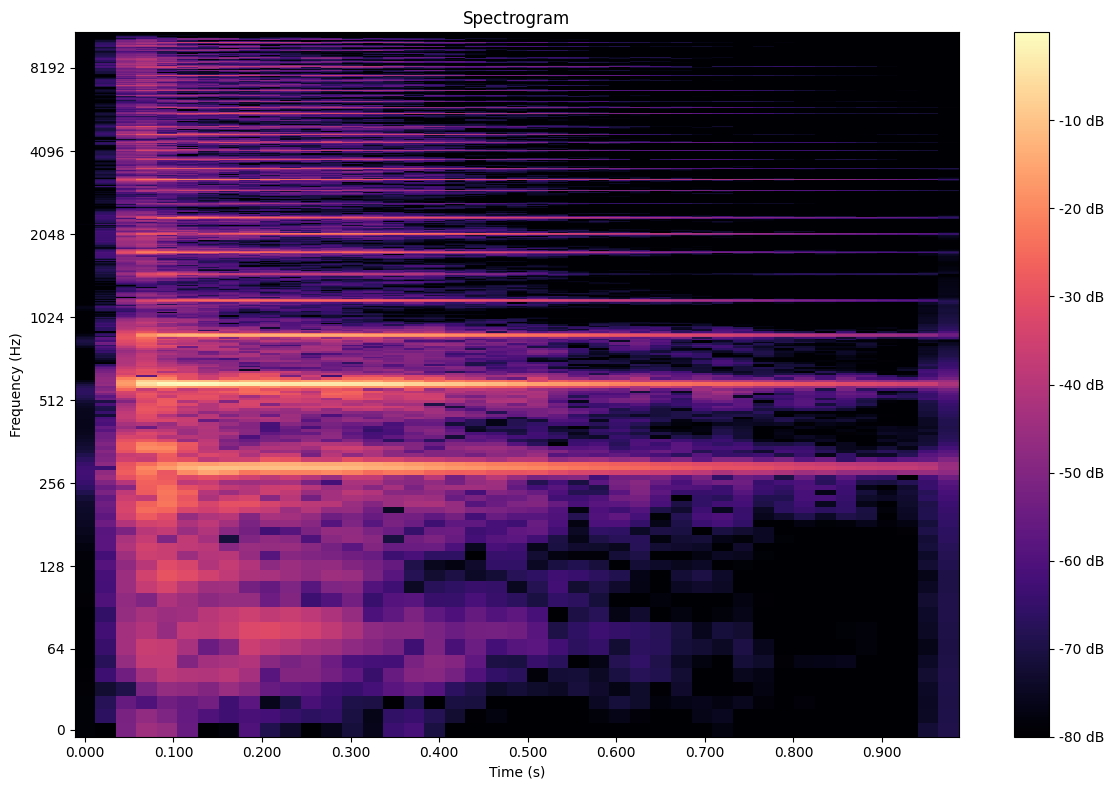

In [4]:
file = './data/D5_Harpsichord.mp3'
create_spectrogram(file)

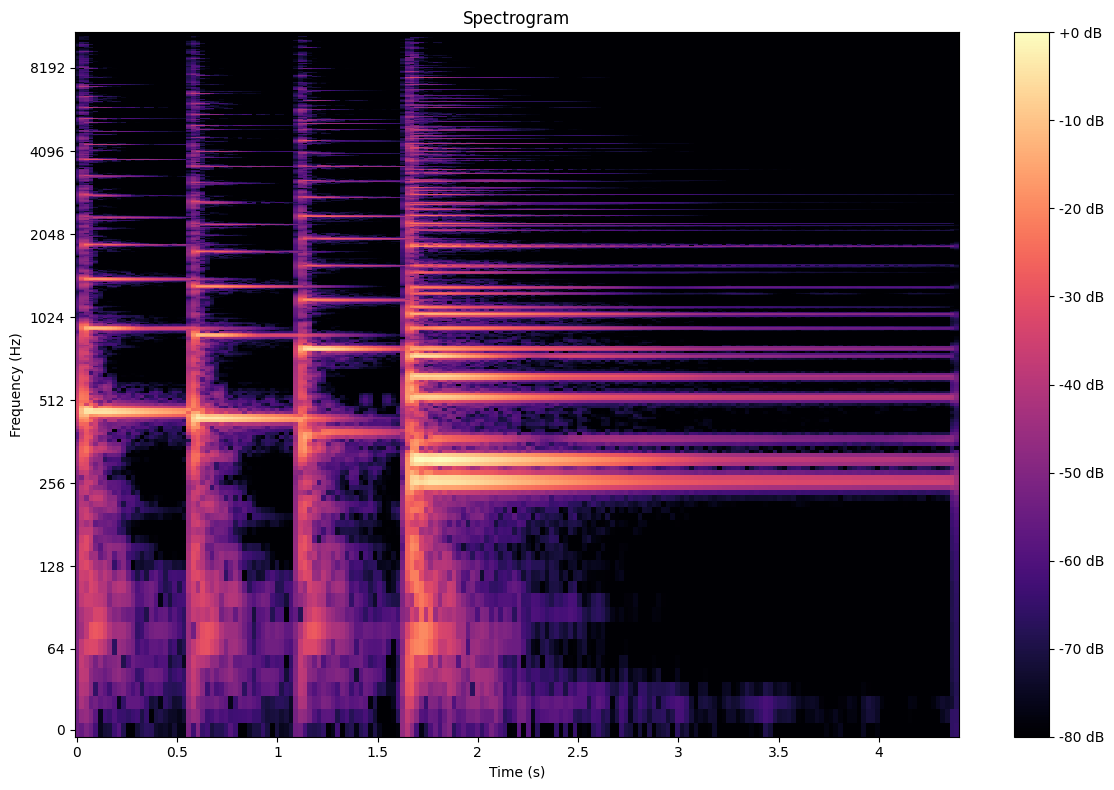

In [5]:

file = './data/Seq1.mp3'
create_spectrogram(file)

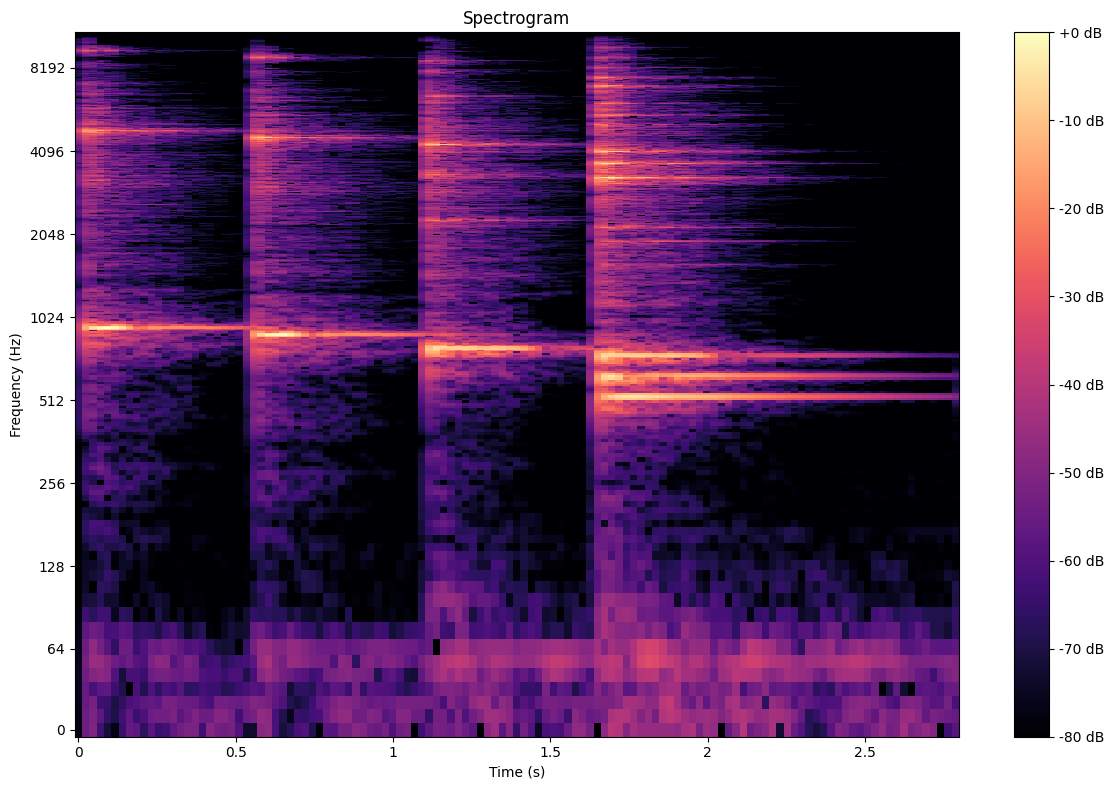

In [6]:

file = './data/Seq1_Xyl.mp3'
create_spectrogram(file)

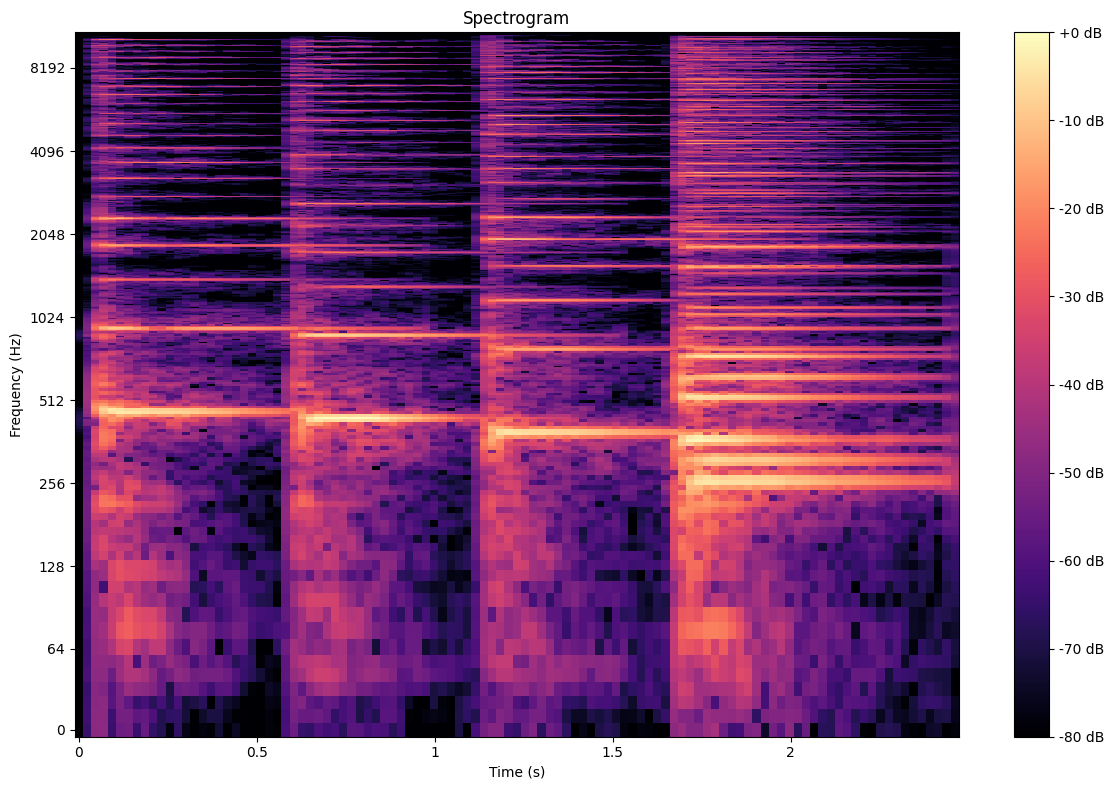

In [7]:
file = './data/Seq1_Harpsichord.mp3'
create_spectrogram(file)

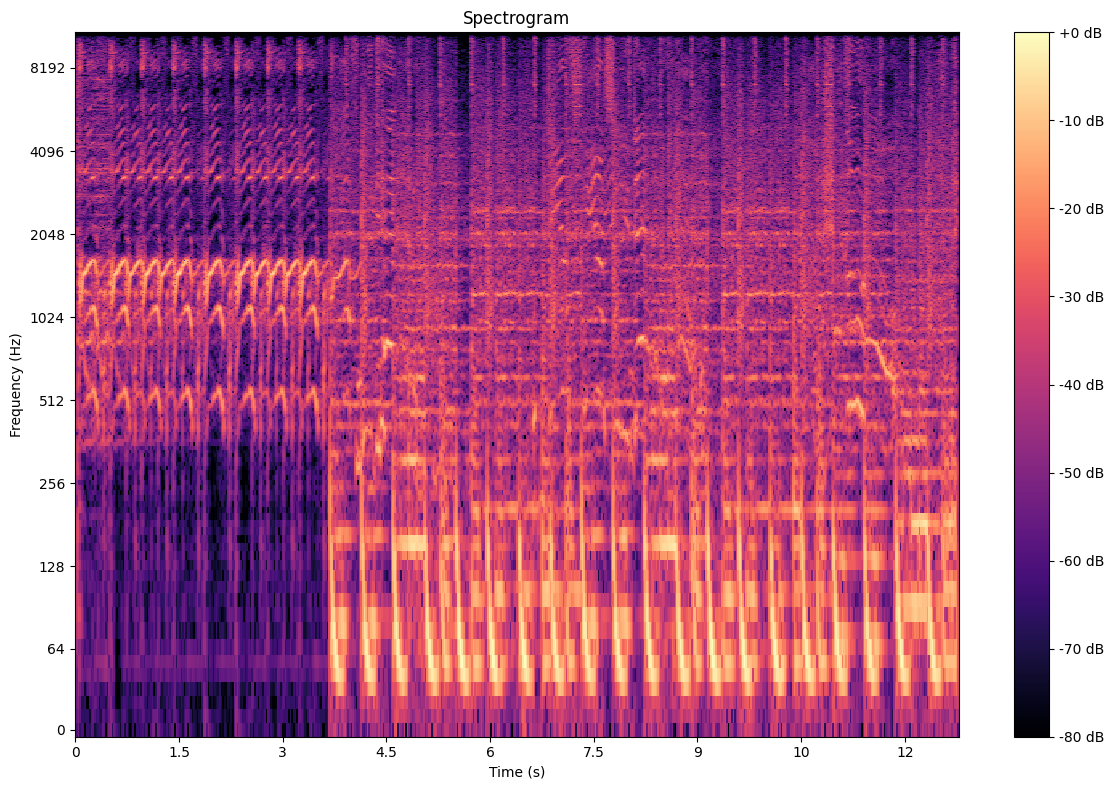

In [8]:

file = './data/Music1.mp3'
create_spectrogram(file)

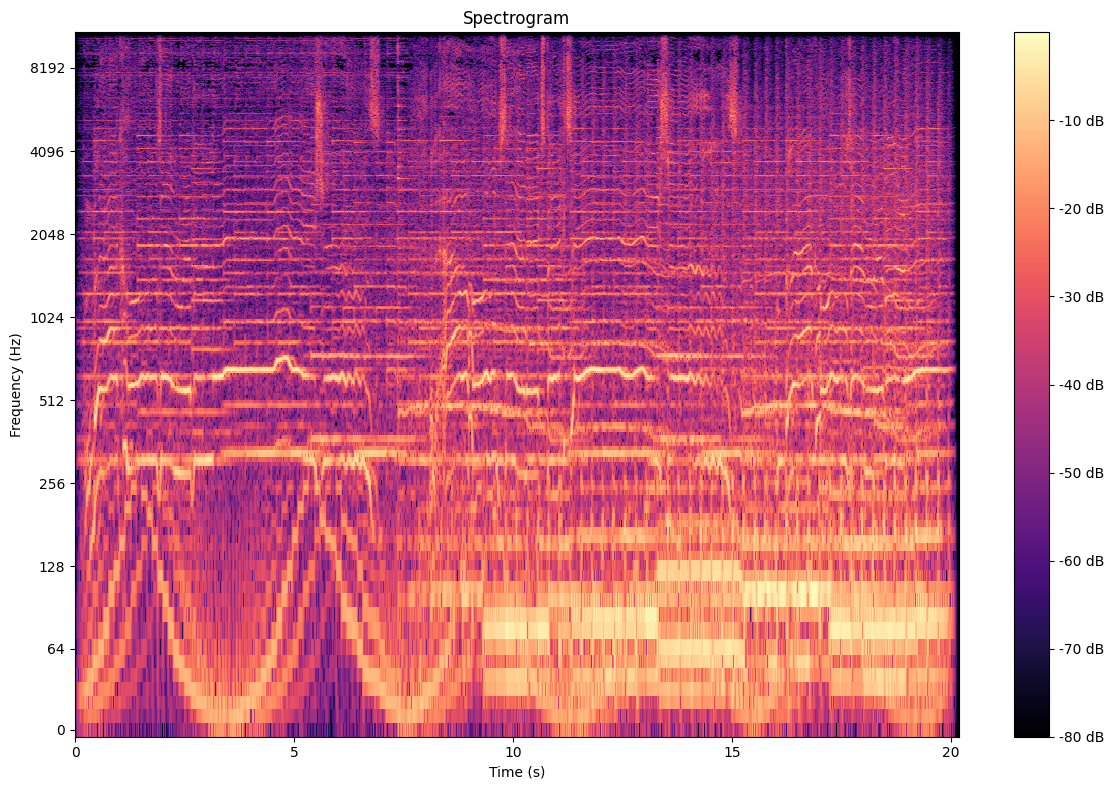

In [9]:

file = './data/museshort.mp3'
create_spectrogram(file)

In [36]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def display_mel_spectrogram_difference(file1, file2):
    # Load the audio files
    y1, sr1 = librosa.load(file1)
    y2, sr2 = librosa.load(file2)

    # Ensure the sample rates match
    if sr1 != sr2:
        raise ValueError(f"Sample rates (sr) of the two files don't match! sr1: {sr1}, sr2: {sr2}")
    # Make the signals the same length by zero-padding the shorter one
    if len(y1) > len(y2):
        y2 = np.pad(y2, (0, len(y1) - len(y2)))
    else:
        y1 = np.pad(y1, (0, len(y2) - len(y1)))
    # Compute Mel spectrograms
    S1 = librosa.feature.melspectrogram(y=y1, sr=sr1)
    S2 = librosa.feature.melspectrogram(y=y2, sr=sr2)

    # Convert to decibel scale
    S1_db = librosa.power_to_db(S1, ref=np.max)
    S2_db = librosa.power_to_db(S2, ref=np.max)

    # Calculate the difference and apply the mask for significant amplitude
    diff = np.abs(S1_db - S2_db)
    significant_amplitude_mask = (S1_db > -40) & (S2_db > -40)  # Threshold of -40 dB

    # Create a masked difference where we only show differences in areas of significant amplitude
    masked_diff = np.where(significant_amplitude_mask, diff, np.nan)

    # Highlight areas with small differences by setting them to a special value (e.g., -60 dB)
    highlight_value = -100
    highlighted_diff = np.where((masked_diff < 10) & significant_amplitude_mask, highlight_value, masked_diff)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Here we plot the 'highlighted_diff' which contains our modifications
    ax = librosa.display.specshow(highlighted_diff, sr=sr1, x_axis='time', y_axis='mel', cmap='coolwarm', vmin=-70, vmax=20)

    # We add a color bar for context.
    plt.colorbar(format='%+2.0f dB')

    plt.title('Difference between Mel Spectrograms with Highlights')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Mel)')
    plt.tight_layout()
    plt.show()

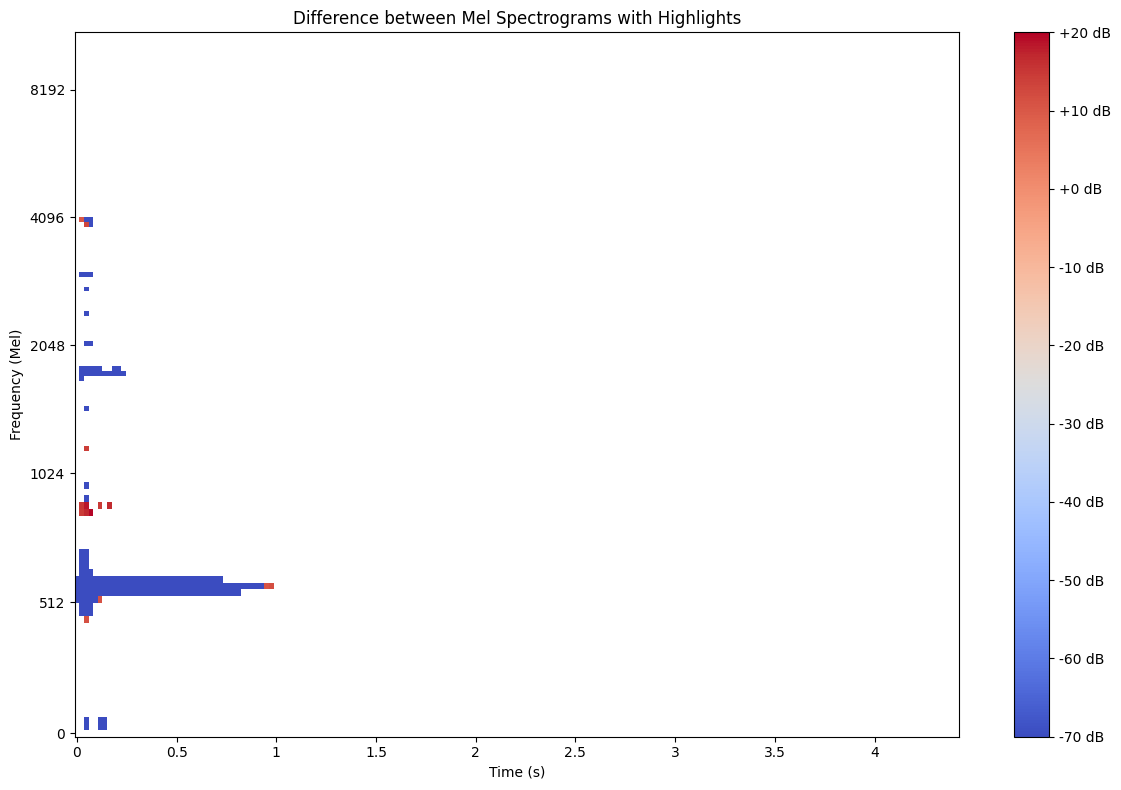

In [37]:
# Replace with your actual audio file names
file1 = './data/D5.mp3'
file2 = './data/D5_Xyl.mp3'

# Display the difference
display_mel_spectrogram_difference(file1, file2)


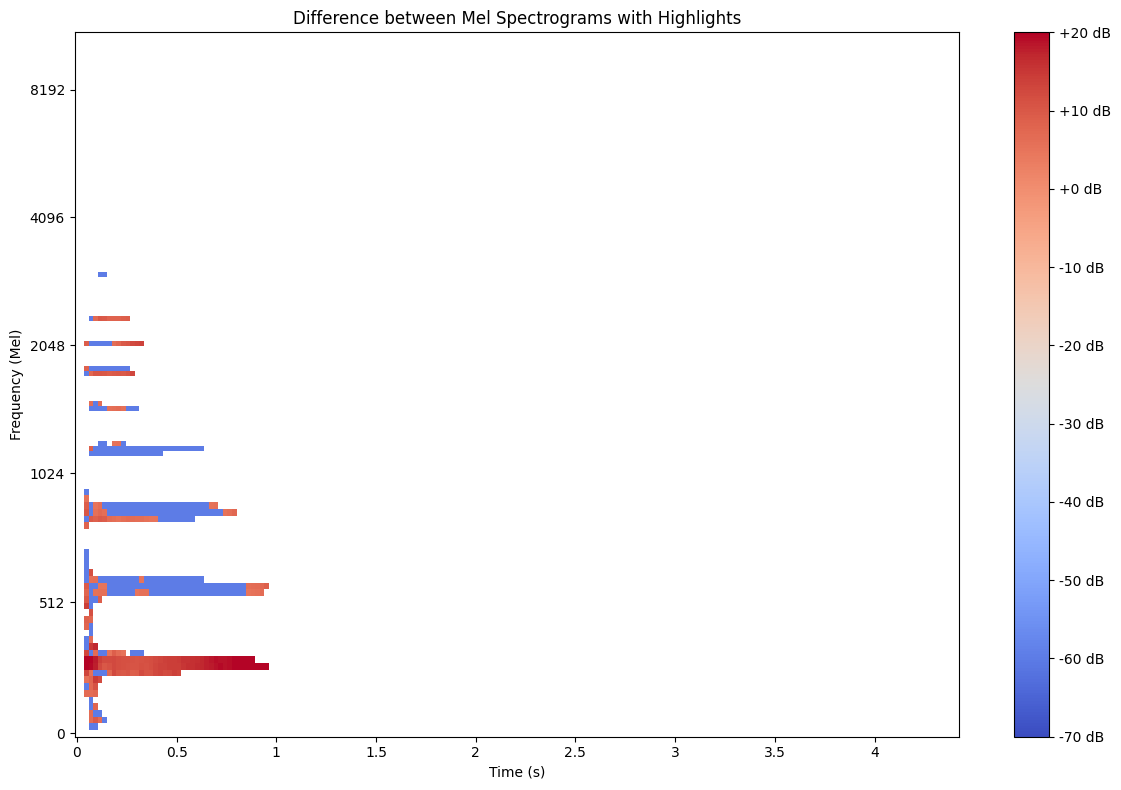

In [34]:
# Replace with your actual audio file names
file1 = './data/D5.mp3'
file2 = './data/D5_Harpsichord.mp3'

# Display the difference
display_mel_spectrogram_difference(file1, file2)
